# HW 0 - Shivesh Menon & Shivam Srivastav

# Problem 2

In [ ]:
#Load packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib.pyplot import plot, show, savefig, xlim, figure, \
                ylim, legend, boxplot, setp, axes
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
import seaborn as sns
from matplotlib.pyplot import figure

In [325]:
df1=pd.read_csv("SpeciesData.csv")
df1 = df1.sample(frac=1).reset_index(drop=True)

In [326]:
df1.head()

,Elevation,Aspect,Slope,HdistWater,VdistWater,HdistRoad,Shade9,Shade12,Shade3,HdistFire,...,Soil32,Soil33,Soil34,Soil35,Soil36,Soil37,Soil38,Soil39,Soil40,Target
0,3233,352,7,731,89,6155,208,229,158,1380,...,0,0,0,0,0,0,0,0,0,1
1,3251,293,21,335,53,927,157,230,211,1442,...,0,0,0,0,0,0,0,0,0,0
2,2646,71,20,240,34,1087,238,197,82,1747,...,0,0,0,0,0,0,0,0,0,0
3,3165,333,8,258,-12,1061,201,229,168,806,...,0,0,0,0,0,0,0,0,0,1
4,3042,1,10,268,126,2922,206,221,153,2188,...,0,1,0,0,0,0,0,0,0,1


In [327]:
corr= df1.corr()
corr.style.background_gradient()

C:\Users\Patron\anaconda3\lib\site-packages\pandas\io\formats\style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\Patron\anaconda3\lib\site-packages\pandas\io\formats\style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Elevation,Aspect,Slope,HdistWater,VdistWater,HdistRoad,Shade9,Shade12,Shade3,HdistFire,WArawah,WAneota,WAcomanche,WAcache,Soil1,Soil2,Soil3,Soil4,Soil5,Soil6,Soil7,Soil8,Soil9,Soil10,Soil11,Soil12,Soil13,Soil14,Soil15,Soil16,Soil17,Soil18,Soil19,Soil20,Soil21,Soil22,Soil23,Soil24,Soil25,Soil26,Soil27,Soil28,Soil29,Soil30,Soil31,Soil32,Soil33,Soil34,Soil35,Soil36,Soil37,Soil38,Soil39,Soil40,Target
Elevation,1.000000,-0.002287,-0.259205,0.308670,0.092596,0.370548,0.135823,0.207080,0.042408,0.153063,0.135448,0.240521,0.060465,-0.613460,-0.206127,-0.181577,-0.169426,-0.185132,-0.156458,-0.221934,-0.002265,-0.003005,-0.057666,-0.423651,-0.138320,-0.115130,-0.044901,-0.091191,nan,-0.059841,-0.110071,-0.073399,0.028287,-0.039690,0.016063,0.160674,0.136562,0.041028,0.031048,-0.015500,0.031776,-0.032875,0.072027,-0.015990,0.061673,0.172103,0.067760,0.002638,0.087101,0.022249,0.028561,0.226224,0.194098,0.206518,0.450420
Aspect,-0.002287,1.000000,0.091933,0.007757,0.065997,0.028640,-0.590619,0.322991,0.651709,-0.112847,-0.149869,0.054824,0.075710,0.101569,-0.000970,0.009221,0.001534,0.021654,0.015570,0.010517,-0.011382,-0.009193,-0.006685,0.044798,-0.063453,-0.064347,0.063312,0.027312,nan,0.010479,0.016150,-0.030979,-0.003724,-0.036982,0.047284,0.021465,0.001996,0.013624,-0.003183,-0.007622,0.015212,0.029714,-0.068608,-0.026133,0.003555,0.043190,0.021274,0.020987,-0.021930,0.000669,-0.020186,0.021692,0.009605,-0.010352,-0.000235
Slope,-0.259205,0.091933,1.000000,-0.021527,0.272489,-0.205242,-0.347677,-0.536391,-0.158667,-0.182085,-0.221518,-0.041413,0.110094,0.263473,0.106086,-0.033172,0.107125,0.137174,0.080175,0.022337,-0.012456,-0.022439,-0.030220,0.247170,-0.051862,-0.166867,0.204602,0.005712,nan,-0.027248,-0.040002,-0.032344,-0.081655,-0.080664,-0.030764,-0.057805,-0.199321,0.072852,0.029149,-0.020015,0.034610,0.079258,-0.074761,0.071576,-0.022883,-0.146647,0.194406,-0.020745,-0.019846,0.001733,0.008745,-0.074657,0.086192,0.009818,-0.108207
HdistWater,0.308670,0.007757,-0.021527,1.000000,0.611033,0.073670,-0.008822,0.038623,0.034477,0.055481,-0.100274,0.068426,0.117094,-0.095457,-0.028212,-0.014066,-0.037117,-0.062960,-0.022457,-0.005519,0.003181,0.007632,-0.021024,-0.063071,-0.004011,0.008924,-0.001155,-0.040817,nan,-0.067424,-0.056447,-0.003299,-0.043741,-0.070697,-0.049943,-0.040873,-0.123693,0.017293,0.012257,0.010604,0.051327,0.012561,-0.013634,-0.047001,0.063162,0.141970,0.095774,0.061817,-0.011925,0.030727,-0.003192,0.050000,0.035833,0.146287,0.001537
VdistWater,0.092596,0.065997,0.272489,0.611033,1.000000,-0.040859,-0.164327,-0.116831,0.031149,-0.072318,-0.181401,-0.018406,0.154708,0.070716,0.009497,0.002502,0.017516,0.016874,0.011657,0.064450,-0.009522,-0.014881,-0.025920,0.056527,-0.019896,-0.048210,0.102391,-0.026772,nan,-0.049773,-0.047928,-0.026336,-0.053465,-0.071762,-0.033162,-0.075744,-0.170304,0.031091,-0.024653,-0.013326,0.071529,0.054310,-0.083382,-0.009004,0.023333,0.047009,0.162229,0.057340,-0.007824,0.012415,-0.000805,-0.009912,0.044661,0.171194,-0.075534
HdistRoad,0.370548,0.028640,-0.205242,0.073670,-0.040859,1.000000,0.034871,0.191173,0.104884,0.342142,0.445112,-0.193466,-0.229146,-0.265507,-0.083695,-0.088460,-0.084916,-0.084627,-0.065702,-0.109841,0.019946,0.030402,-0.040721,-0.181113,-0.100652,0.052098,-0.050474,-0.035123,nan,0.016757,-0.050784,-0.046571,0.066188,0.062560,-0.015216,0.045615,0.007478,-0.030735,-0.034958,0.006718,0.011292,-0.029741,0.300414,0.070866,-0.061948,-0.086941,-0.084089,-0.002033,0.001509,0.006696,0.012124,0.073916,0.031924,0.020860,0.133807
Shade9,0.135823,-0.590619,-0.347677,-0.008822,-0.164327,0.034871,1.000000,0.015470,-0.782615,0.148465,0.204166,0.005764,-0.094767,-0.227433,-0.006094,0.028194,0.028830,0.021690,-0.053890,-0.014250,0.005058,0.006109,0.019391,-0.220938,0.053180,0.091947,-0.102182,-0.014978,nan,-0.010932,-0.006797,0.032180,0.014739,0.036381,-0.019109,-0.001809,0.042057,-0.094008,0.032474,0.029220,-0.019559,-0.103575,0.084722,0.101834,-0.045712,0.016142,-0.057074,

In [328]:
df1['Soil15']

0        0
1        0
2        0
3        0
4        0
        ..
11679    0
11680    0
11681    0
11682    0
11683    0
Name: Soil15, Length: 11684, dtype: int64

In [329]:
df1.shape

(11684, 55)

In [330]:
df1.isnull().sum()

Elevation     0
Aspect        0
Slope         0
HdistWater    0
VdistWater    0
HdistRoad     0
Shade9        0
Shade12       0
Shade3        0
HdistFire     0
WArawah       0
WAneota       0
WAcomanche    0
WAcache       0
Soil1         0
Soil2         0
Soil3         0
Soil4         0
Soil5         0
Soil6         0
Soil7         0
Soil8         0
Soil9         0
Soil10        0
Soil11        0
Soil12        0
Soil13        0
Soil14        0
Soil15        0
Soil16        0
Soil17        0
Soil18        0
Soil19        0
Soil20        0
Soil21        0
Soil22        0
Soil23        0
Soil24        0
Soil25        0
Soil26        0
Soil27        0
Soil28        0
Soil29        0
Soil30        0
Soil31        0
Soil32        0
Soil33        0
Soil34        0
Soil35        0
Soil36        0
Soil37        0
Soil38        0
Soil39        0
Soil40        0
Target        0
dtype: int64

In [331]:
df1.drop(['Soil15'],axis=1,inplace=True)

In [332]:
df1.dtypes

Elevation     int64
Aspect        int64
Slope         int64
HdistWater    int64
VdistWater    int64
HdistRoad     int64
Shade9        int64
Shade12       int64
Shade3        int64
HdistFire     int64
WArawah       int64
WAneota       int64
WAcomanche    int64
WAcache       int64
Soil1         int64
Soil2         int64
Soil3         int64
Soil4         int64
Soil5         int64
Soil6         int64
Soil7         int64
Soil8         int64
Soil9         int64
Soil10        int64
Soil11        int64
Soil12        int64
Soil13        int64
Soil14        int64
Soil16        int64
Soil17        int64
Soil18        int64
Soil19        int64
Soil20        int64
Soil21        int64
Soil22        int64
Soil23        int64
Soil24        int64
Soil25        int64
Soil26        int64
Soil27        int64
Soil28        int64
Soil29        int64
Soil30        int64
Soil31        int64
Soil32        int64
Soil33        int64
Soil34        int64
Soil35        int64
Soil36        int64
Soil37        int64


In [333]:
MMS = MinMaxScaler()
df1_final= MMS.fit_transform(df1)
df1_final=pd.DataFrame(df1_final,columns=df1.columns)

In [334]:
df1_final

,Elevation,Aspect,Slope,HdistWater,VdistWater,HdistRoad,Shade9,Shade12,Shade3,HdistFire,...,Soil32,Soil33,Soil34,Soil35,Soil36,Soil37,Soil38,Soil39,Soil40,Target
0,0.694003,0.980501,0.132075,0.537105,0.331551,0.864952,0.771144,0.844720,0.624506,0.195745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.703229,0.816156,0.396226,0.246143,0.283422,0.130270,0.517413,0.850932,0.833992,0.204539,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.393132,0.197772,0.377358,0.176341,0.258021,0.152754,0.920398,0.645963,0.324111,0.247801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.659149,0.927577,0.150943,0.189566,0.196524,0.149101,0.736318,0.844720,0.664032,0.114326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.596105,0.002786,0.188679,0.196914,0.381016,0.410624,0.761194,0.795031,0.604743,0.310355,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11679,0.415684,0.019499,0.320755,0.119030,0.223262,0.291315,0.711443,0.683230,0.557312,0.994894,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11680,0.599180,0.192201,0.188679,0.155768,0.211230,0.290613,0.885572,0.795031,0.482213,0.223262,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11681,0.229113,0.894150,0.528302,0.049229,0.243316,0.026981,0.427861,0.670807,0.770751,0.032340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11682,0.695028,0.323120,0.320755,0.158707,0.272727,0.234120,0.965174,0.801242,0.383399,0.199433,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [335]:
y_train = df1_final['Target']
x_train = df1_final.drop(['Target'],axis=1)


In [336]:
y_train.shape

(11684,)

In [337]:
y_test.shape

(2337,)

In [338]:
paramlog = np.logspace(-4,5,10,base=10)
paramlog

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04, 1.e+05])

In [339]:
#Training for L1 model
logregl1 = LogisticRegressionCV(Cs =paramlog,cv=10,penalty="l1",solver="liblinear",max_iter=100,scoring="roc_auc")

In [340]:
logregl1.fit(x_train,y_train)

LogisticRegressionCV(Cs=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04, 1.e+05]),
                     cv=10, penalty='l1', scoring='roc_auc',
                     solver='liblinear')

In [387]:
y_predl1 = logregl1.predict_proba(x_train).T[1]

In [388]:
scorel1 = logregl1.score(x_train,y_train)

In [389]:
scorel1

0.8349760233613958

In [390]:
logregl1.score

<bound method LogisticRegressionCV.score of LogisticRegressionCV(Cs=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04, 1.e+05]),
                     cv=10, penalty='l1', scoring='roc_auc',
                     solver='liblinear')>

In [391]:
scores=logregl1.scores_[1]
scores
scoresfl1 = pd.DataFrame(scores)

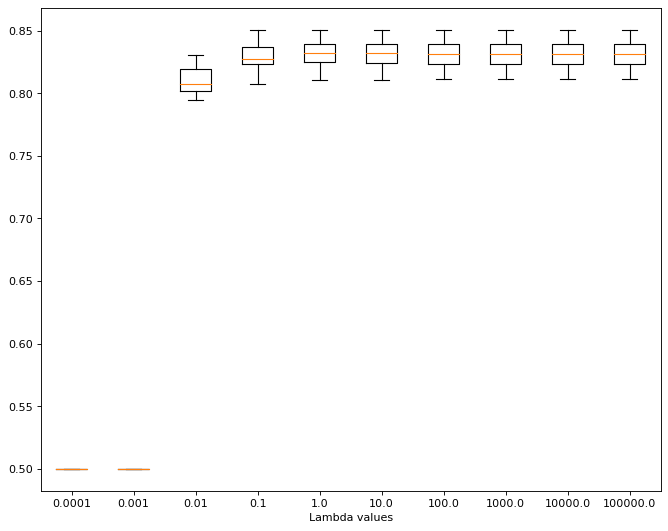

In [392]:
#Box Plot for L1 Model
figure(num=1,figsize=(10, 8), dpi=80)
plt.xlabel("Lambda values")
plt.xscale
plt.boxplot(scoresfl1,labels=logregl1.Cs_)
plt.show()

In [393]:
fig
scoresfl1.columns = logregl1.Cs_

In [500]:
scoresfl1.median()
print("Best lamda L1 regularization:",scoresfl1.median().idxmax())

Best lamda L1 regularization: 1.0


In [426]:
#Best Lamba -1.0
lamdal1=[1.0]

In [411]:
#Training l2 model
logregl2 = LogisticRegressionCV(Cs =paramlog,cv=10,penalty="l2",solver="lbfgs",max_iter=1000,scoring="roc_auc")
clfl2=logregl2.fit(x_train,y_train)

In [412]:
y_predl2 = logregl2.predict_proba(x_train).T[1]

In [413]:
y_predl2

array([5.29196646e-01, 7.78550835e-01, 6.61347629e-02, ...,
       7.22212866e-04, 7.28046178e-01, 7.18488622e-01])

In [414]:
scorel2= logregl2.score(x_test,y_test)

In [415]:
scorel2

0.8381405421035429

In [416]:
scoresfl2 = pd.DataFrame(logregl2.scores_[1])

In [417]:
scoresfl2.columns = logregl2.Cs

In [501]:

print(np.max(scoresfl2))
print("-------------------")
print(" ----------Median------------")
print("Best lamda L-2 regularization:",scoresfl2.median().idxmax())

0.0001         0.752742
0.0010         0.783964
0.0100         0.823029
0.1000         0.842002
1.0000         0.850474
10.0000        0.850703
100.0000       0.850603
1000.0000      0.850615
10000.0000     0.850615
100000.0000    0.850612
dtype: float64
-------------------
 ----------Median------------
Best lamda L-2 regularization: 1.0


In [496]:
# Best Lamda Value - 1.0
lambdal2
lamdal2=[1.0]


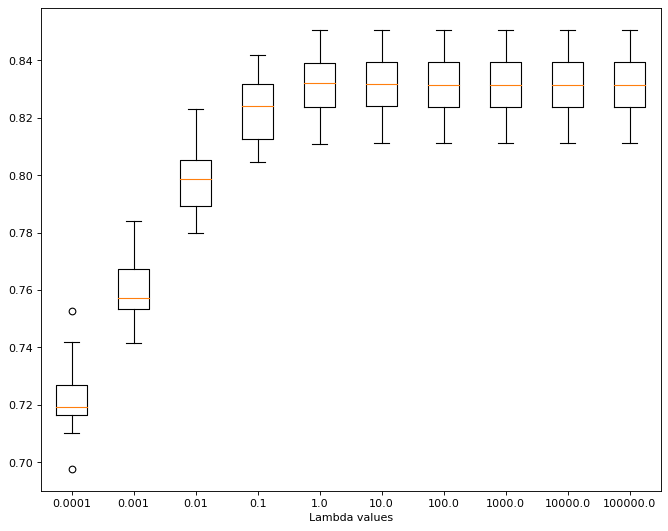

In [438]:
#Box Plot for L2 model
figure(num=1,figsize=(10, 8), dpi=80)
plt.xlabel("Lambda values")
plt.xscale
plt.boxplot(scoresfl2,labels=logregl2.Cs_)
plt.show()

**1(a) Which model (L1 or L2) took longer to train? Why?**

Ans. L1 model took longer to train. We have taken liblinear solver for training the l1 model which is efficient only for smaller datasets(the dataset we have used is large!) and doesn't support warm start either which results in more computational time each time we fit the model.
lbfgs solver on the other hand, which we have used for training l2 model takes up only a limited amount of computational memory as it discards earlier gradients and accumulates only fresh gradients.

**1(c) What is the best lambda value for L1-regularization? L2-regularization?**
Ans. Best lamda of L1 regularization - 1.0
     Best lamda of L2 regularization - 1.0


In [439]:
x_trainQ2,x_testQ2,y_trainQ2,y_testQ2 = train_test_split(x,y,test_size=0.2,random_state=21)

In [429]:
#L1 Model prediction
l1model = LogisticRegression(solver='liblinear',max_iter=100)
paramsl1= {'C':lamdal1,'penalty':['l1']}
clfl1 = GridSearchCV(l1model,paramsl1, cv=10,scoring='roc_auc')
#Run the gridsearch
clfl1.fit(x_trainQ2,y_trainQ2)
i
#print results
clfl1.cv_results_

{'mean_fit_time': array([4.94174333]),
 'std_fit_time': array([1.01475682]),
 'mean_score_time': array([0.00896521]),
 'std_score_time': array([0.00224092]),
 'param_C': masked_array(data=[1.0],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1.0, 'penalty': 'l1'}],
 'split0_test_score': array([0.82039437]),
 'split1_test_score': array([0.82427015]),
 'split2_test_score': array([0.81706032]),
 'split3_test_score': array([0.83682334]),
 'split4_test_score': array([0.84836501]),
 'split5_test_score': array([0.85304273]),
 'split6_test_score': array([0.82491245]),
 'split7_test_score': array([0.8385994]),
 'split8_test_score': array([0.82458451]),
 'split9_test_score': array([0.82368669]),
 'mean_test_score': array([0.8311739]),
 'std_test_score': array([0.01167292]),
 'rank_test_score': array([1])}

In [431]:
predsl1 = clfl1.predict_proba(x_testQ2).T[1]

In [482]:
#roc for l1 Model
fprl1,tprl1,threshl1 = roc_curve(y_testQ2,predsl1)
roc_auc_l1 = roc_auc_score(y_testQ2,predsl1)
print(roc_auc_l1)


0.8357275087375224


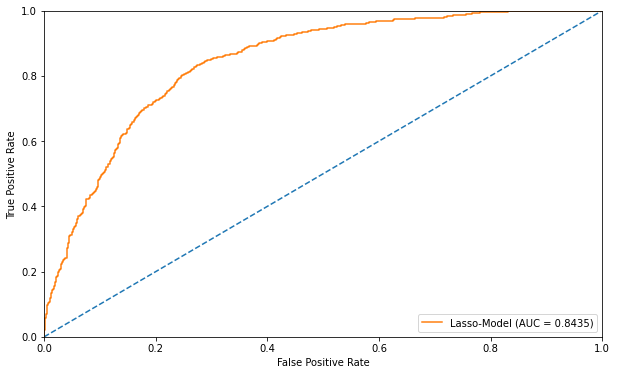

In [234]:
#Roc Plot for l1 model
fig = figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fprl1, tprl1, label='Lasso-Model (AUC = %0.4f)' % roc_auc_l1)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [466]:
#L2 Model prediction
l2model = LogisticRegression(solver='lbfgs',max_iter=1000)
paramsl2= {'C':lamdal2,'penalty':['l2']}
clfl2 = GridSearchCV(l2model,paramsl2, cv=10,scoring='roc_auc')
#Run the gridsearch
clfl2.fit(x_trainQ2,y_trainQ2)

#print results
clfl2.cv_results_

{'mean_fit_time': array([0.30585217]),
 'std_fit_time': array([0.06318913]),
 'mean_score_time': array([0.00789797]),
 'std_score_time': array([0.00226439]),
 'param_C': masked_array(data=[1.0],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l2'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1.0, 'penalty': 'l2'}],
 'split0_test_score': array([0.81974431]),
 'split1_test_score': array([0.82427015]),
 'split2_test_score': array([0.81725238]),
 'split3_test_score': array([0.83682826]),
 'split4_test_score': array([0.84692382]),
 'split5_test_score': array([0.8518524]),
 'split6_test_score': array([0.82399756]),
 'split7_test_score': array([0.83810609]),
 'split8_test_score': array([0.82516168]),
 'split9_test_score': array([0.8234203]),
 'mean_test_score': array([0.8307557]),
 'std_test_score': array([0.01128632]),
 'rank_test_score': array([1])}

In [467]:
predsl2 = clfl2.predict_proba(x_testQ2).T[1]

In [478]:
#roc for l2 Model
fprl2,tprl2,threshl2 = roc_curve(y_testQ2,predsl2)
roc_auc_l2 = roc_auc_score(y_testQ2,predsl2)
print(roc_auc_l2)

0.83458110180785


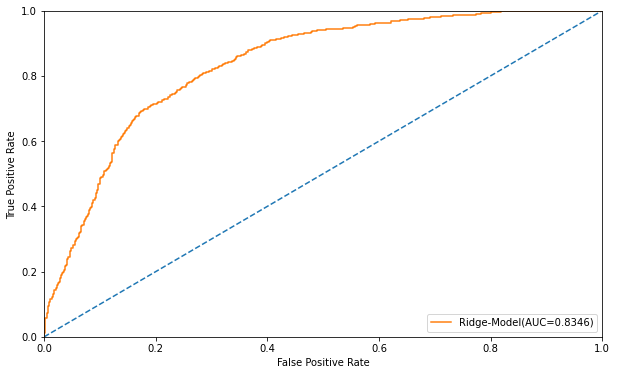

In [469]:
#Roc Plot for l2 model
fig = figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fprl2,tprl2,label='Ridge-Model(AUC=%0.4f)'%roc_auc_l2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**2(a) Plot the ROC curve for each model. Which model do you prefer? Why?**
Ans. l1 model is preferred as AUC(performance metric for logistic regression) for Lasso model(0.8435) is higher compared to Ridge model(0.8346) 

In [487]:
#create Target matrix for l1 model
j=0
for i in threshl1:
    if tprl1[j] >=0.85:
        break
    j=j+1
print("Threshold value:",threshl1[j])
print("True positive rate:",tprl1[j])
print("False positive rate:",fprl1[j])
Threshvl1 = threshl1[j]
y_predl1Tar=[]
count1=0
count2=0
for k in predsl1:
    if k >= Threshvl1:
        y_predl1Tar.append(1)
        count1=count1 + 1
    else:
        y_predl1Tar.append(0)
        count2=count2+1
        
print(count1)
print(count2)

Threshold value: 0.3165094557570424
True positive rate: 0.8541666666666666
False positive rate: 0.3421588594704684
1242
1095


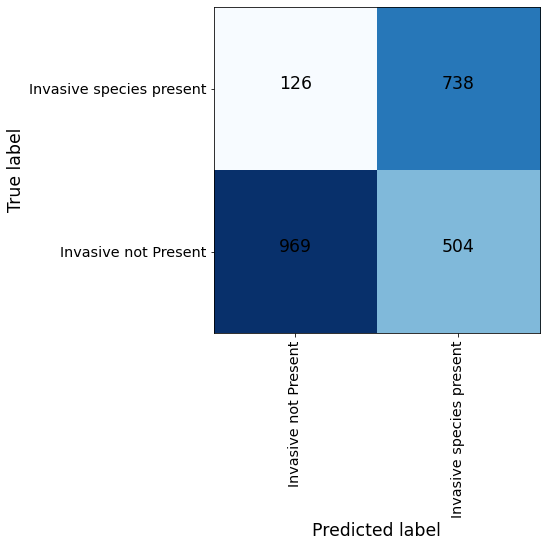

In [488]:
#Confusion matrix for L1 model
cMatrix = confusion_matrix(y_testQ2,y_predl1Tar)
figl1= figure(figsize=(11,6))
plt.imshow(cMatrix, cmap=plt.cm.Blues)
plt.text(0, 0, '{}'.format(cMatrix[0, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(0, 1, '{}'.format(cMatrix[1, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 0, '{}'.format(cMatrix[0, 1]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 1, '{}'.format(cMatrix[1, 1]), horizontalalignment='center',fontsize = 'xx-large')
tick_marks = [0,1]
plt.ylim([-0.5,1.5])
labels = ['Invasive not Present','Invasive species present']
plt.xticks(tick_marks, labels, rotation=90,fontsize = 'x-large')
plt.yticks(tick_marks, labels,fontsize = 'x-large')
plt.ylabel('True label',fontsize = 'xx-large')
plt.xlabel('Predicted label',fontsize = 'xx-large')
plt.show()
fig.savefig('LR_CM.pdf', bbox_inches='tight')


In [489]:
#Target Matrix For l2 model
j=0
for i in threshl2:
    if tprl2[j] >=0.85:
        break
    j=j+1
print("Threshold value:",threshl2[j])
print("True positive rate:",tprl2[j])
print("False positive rate:",fprl2[j])
Threshvl2 = threshl2[j]
y_predl2Tar=[]
count1=0
count2=0
for k in predsl2:
    if k >= Threshvl2:
        y_predl2Tar.append(1)
        count1=count1 + 1
    else:
        y_predl2Tar.append(0)
        count2=count2+1
        
print(count1)
print(count2)

Threshold value: 0.32967540674591445
True positive rate: 0.8506944444444444
False positive rate: 0.34147997284453496
1238
1099


**2(b)Suppose we want a true positive rate of at least 0.85. What is the corresponding
false positive rate for each model? What is the corresponding threshold rule
for each model?**
Ans -**For l1 model** :-
     Threshold value: 0.3165094557570424
     False positive rate: 0.3421588594704684
     **For l2 model** :-
     Threshold value: 0.32967540674591445
     False positive rate: 0.34147997284453496
     


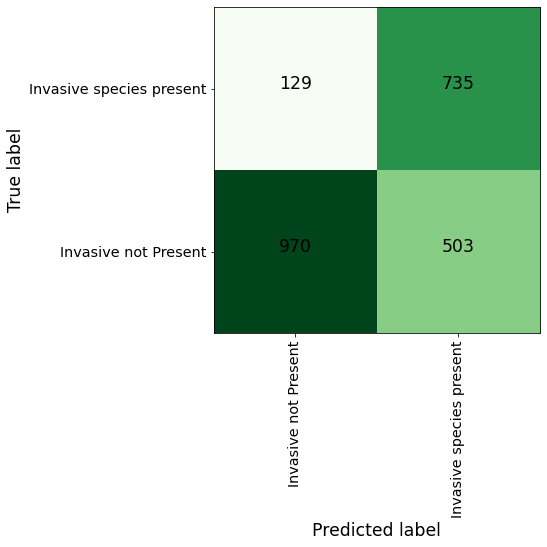

In [490]:
cMatrix = confusion_matrix(y_test,y_predl2Tar)
figl2= figure(figsize=(11,6))
plt.imshow(cMatrix, cmap=plt.cm.Greens)
plt.text(0, 0, '{}'.format(cMatrix[0, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(0, 1, '{}'.format(cMatrix[1, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 0, '{}'.format(cMatrix[0, 1]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 1, '{}'.format(cMatrix[1, 1]), horizontalalignment='center',fontsize = 'xx-large')
tick_marks = [0,1]
plt.ylim([-0.5,1.5])
labels = ['Invasive not Present','Invasive species present']
plt.xticks(tick_marks, labels, rotation=90,fontsize = 'x-large')
plt.yticks(tick_marks, labels,fontsize = 'x-large')
plt.ylabel('True label',fontsize = 'xx-large')
plt.xlabel('Predicted label',fontsize = 'xx-large')
plt.show()
fig.savefig('LR_CM.pdf', bbox_inches='tight')

**2(c)For each model, use the threshold rule from 2b to convert your predicted probabilities
to binary classes and create a confusion matrix. Which model do you
prefer? Why?**
L2 model is better as it has lower false positives. 
I have chosen false positives as a metric because a false positive can lead to cutting off trees from a forest land incurring huge deforestation losses.